# Bayesian Optimization

In [7]:
import sys

sys.path.append("../")

In [8]:
import os

from settings import dev, prod
from src.scan import optimize
from src.scan.decorators import response_measurements, add_noise
from src.scan.utils import plot_meters_data, plot_motors_data, clear_output
from src.core import config as cfg

DIRNAME = "bayes"

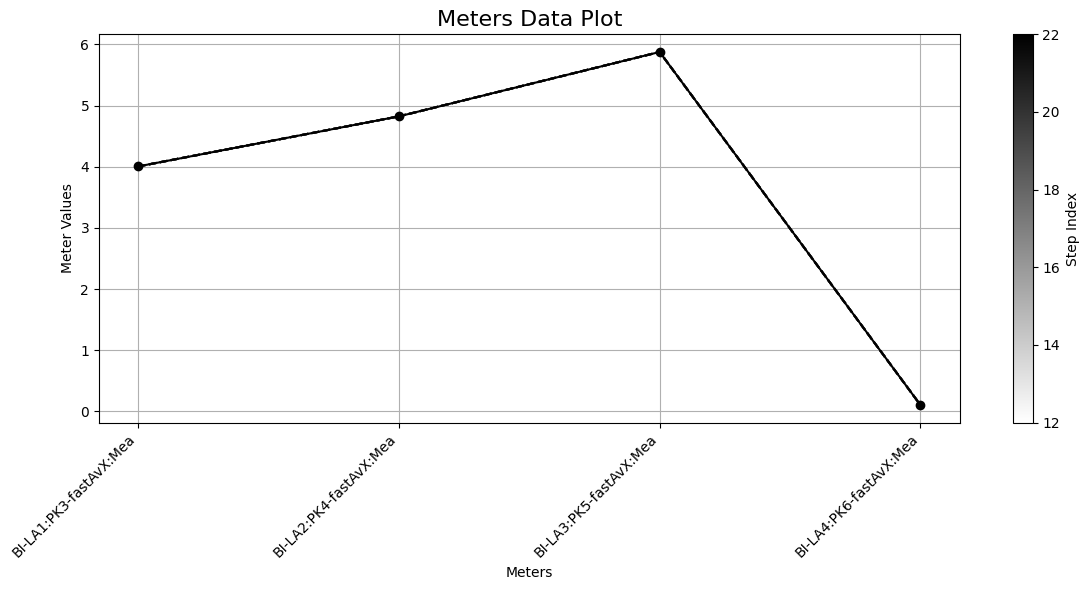

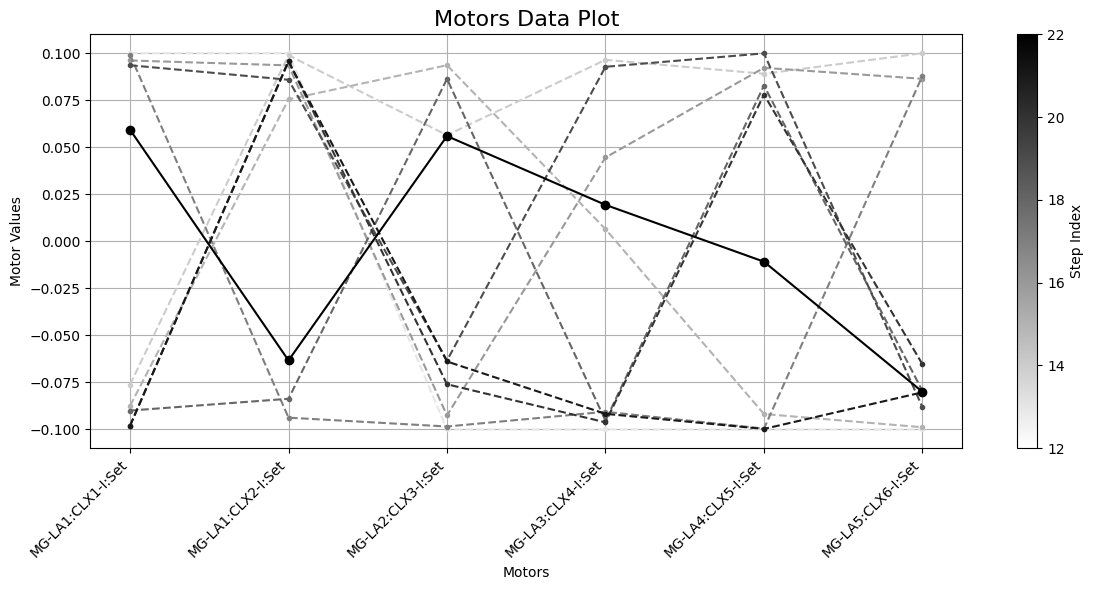

Set motor values:   0%|          | 0/6 [00:00<?, ?it/s]

In [9]:
prod_scan = optimize(
    meters=prod.HORIZONTAL_MONITORS, 
    motors=[[name, [prod.GET_FUNC(name), prod.GET_FUNC(name)+prod.DEFAULT_DELTA_KICK]] for name, _ in prod.HORIZONTAL_CORRECTORS], 
    get_func=prod.GET_FUNC, 
    put_func=prod.PUT_FUNC,  
    sample_size=prod.SAMPLE_SIZE,
    verify_motor=prod.VERIFY_MOTOR,
    max_retries=prod.MAX_TRIES,
    delay=prod.DELAY,
    tolerance=prod.TOLERANCE,
    save=prod.SAVE_SCAN,
    dirname=os.path.join(prod.DIRNAME_DATA, DIRNAME),
    callback=[clear_output, plot_meters_data, plot_motors_data], 
    save_original_motor_values=prod.SAVE_ORIGINAL_MOTOR_VALUES,
    parallel=prod.PARALLEL,
    repeat=prod.REPEAT,
)

In [3]:
dev_scan = optimize(
    meters=dev.HORIZONTAL_MONITORS, 
    motors=[[name, [dev.GET_FUNC(name), dev.GET_FUNC(name)+dev.DEFAULT_DELTA_KICK]] for name, _ in dev.HORIZONTAL_CORRECTORS], 
    get_func=add_noise(dev.NOISE_LEVEL)(dev.GET_FUNC), 
    put_func=dev.PUT_FUNC, 
    sample_size=dev.SAMPLE_SIZE,
    verify_motor=dev.VERIFY_MOTOR,
    max_retries=dev.MAX_TRIES,
    delay=dev.DELAY,
    tolerance=dev.TOLERANCE,
    save=dev.SAVE_SCAN,
    dirname=os.path.join(dev.DIRNAME_DATA, DIRNAME),
    callback=[clear_output, plot_meters_data, plot_motors_data], 
    save_original_motor_values=dev.SAVE_ORIGINAL_MOTOR_VALUES,
    parallel=dev.PARALLEL,
    repeat=dev.REPEAT,
)

2025-02-04 13:49:46,830 - Elegant - ERROR - Elegant run failed with return code 1 for file: '/home/skif/fedorov/scaut/notebooks/elegant/config.ele'


ElegantProcessError: Elegant run failed with return code 1 for file: '/home/skif/fedorov/scaut/notebooks/elegant/config.ele'